## Final Project Submission

Please fill out:
* Student name: Irene Ngina Kibengo
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:


# Identifying Low-Risk Aircraft Models For New Aviation Ventures

# 1. Business Understanding

This project is designed to support aviation entrepreneurs and startups by offering a data-driven analysis of historical aircraft accident data to identify aircraft types associated with lower safety risks. By uncovering patterns and trends in past incidents, the project provides valuable insights that can guide strategic fleet selection. These insights enable stakeholders to make informed decisions that prioritize operational safety, minimize potential liabilities, and support the successful launch and growth of aviation ventures.

## Stakeholders

The primary stakeholder for this project is the head of aviation division, who is responsible for overseeing fleet decisions, operational safety, and long-term strategic planning. This project provides data-driven insights that support informed decision-making around aircraft selection, helping minimize operational risk and ensure compliance with safety standards. By identifying aircraft models with lower historical accident rates, the project aims to enhance fleet safety while reducing the financial and reputational risks associated with high-risk aircraft.

## Conclusion: Implications

This project highlights how historical aviation accident data can be leveraged to generate actionable insights that inform aviation business strategy. By identifying aircraft models associated with lower incident rates, the analysis supports more informed and safety-conscious fleet selection. These insights not only enhance passenger safety but also promote long-term financial sustainability by helping aviation startups avoid high-risk investments.


# 2. Data Understanding



## Data Source 

The dataset used in this project comes from the Aviation Accident Database (Synopses) on Kaggle, which is compiled from official U.S. National Transportation Safety Board (NTSB) accident reports. It contains essential information including the date and location of each incident, aircraft make and model, type of operation (e.g., commercial or private), number of fatalities and injuries, and a brief narrative summarizing the circumstances of the event.

This data is critical for uncovering safety-related patterns—such as which aircraft models are more commonly involved in accidents, which operational contexts carry higher risk, and the most frequent contributing factors. These insights directly support the project’s objective of assessing relative safety risks across various aircraft types.

An initial data exploration phase will focus on evaluating data quality, detecting missing or inconsistent entries, and analyzing the distribution of key variables. Establishing a strong understanding of the dataset at this stage is essential to ensure that the analysis remains accurate, meaningful, and aligned with the broader goal of recommending low-risk aircraft models for strategic fleet selection.

## Requirements

#### 1. Key Fields
* Aircraft make and model
* Date and location of incidtion 
* Number of fatalities and injuries
* Accident synopsis and summary

### 2. Exploratory Data Analysis(EDA)
* Identify patterns in accident frequency by aircraft model
* Determine which types of operations (commercial vs private) have higher risks
* Analyze accident severity by type

### 3. Data Cleaning 
* Handle missing and inconsistent values







## Load the Dataset

Before we load our dataset we import the below libraries. the Import warnings will tell python to supress all warnings messages.

In [70]:
# Importing necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Next step is to load the dataset in a pandas dataframe using read_csv method and display the first few rows.

In [88]:
# Loading the dataset
df= pd.read_csv('data/Aviation_Data.csv')

# Shows the first few rows 
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The Aviation accident dataset contains historical records of aircraft incidents compiled from NTSB reports. This dataset will serve as the basis for identifying aircraft models associated with lower safety risk.

## Dataset Overview

In [74]:
# Dataset shape and summary
df.shape


(90348, 31)

The dataset has 90348 rows and 31 columns.

In [76]:
# Dataset summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The .info() method provides a concise summary of the DataFrame. In this aviation dataset, there are 90,348 rows and 31 columns. Among these, 5 columns are of float data type, while the remaining 26 columns are of object data type, typically representing strings or mixed data.

In [78]:
# Summary statistics for numerical column

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The summary statistics offer valuable insights into key variables such as the number of engines, fatal injuries, serious injuries, minor injuries, and the total number of uninjured individuals. On average, each incident involved approximately 0.65 fatal injuries, 0.36 minor injuries, and 0.28 serious injuries, while about 5.33 individuals remained uninjured per case. These averages indicate that most incidents did not result in any injuries, as the mean values for fatalities and injuries are all below one. This suggests that while some incidents were severe, the majority involved no injuries at all. However, the relatively high average of uninjured individuals points to a consistent presence of survivors or unaffected individuals in each incident.


In [80]:
# finding missing values 
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

The .isnull().sum() method helps detect missing data by returning the count of null (or missing) values in each column of the aviation dataset. Event Id, Event date and Accident number have no missing values. Location is missing 1511 entries, Latitude and longitude have a high number of missing values. This indicates that geographical data is largely incomplete. Injury related fields like Total.Fatal.Injuries, Total.Serious.Injuries, and Total.Minor.Injuries have thousands of missing entries—this may reflect cases where injury details were not recorded or not applicable. Columns such as Schedule, Air.carrier, and FAR.Description are missing in over 70,000 records, which might significantly impact analysis involving those fields.


In [46]:
# Check for unique values in key categorical columns
df['Make'].value_counts().head(10)
df['Make']

0                           Stinson
1                             Piper
2                            Cessna
3                          Rockwell
4                            Cessna
                    ...            
90343                         PIPER
90344                      BELLANCA
90345    AMERICAN CHAMPION AIRCRAFT
90346                        CESSNA
90347                         PIPER
Name: Make, Length: 90348, dtype: object

In [82]:
# Check distribution of accident data
#Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()
#Convert the 'Event.Date' column to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
# Check the date range
print("Date range of accident data:")
print(f"From {df['Event.Date'].min().date()} to {df['Event.Date'].max().date()}")


Date range of accident data:
From 1948-10-24 to 2022-12-29


 # Data Cleaning
 

Dropping columns with missing values like location which has 1511 missing values . The location column will not be used in this analysis.


In [90]:
df.drop(columns=['Location'], inplace=True)

 Next we will impute the injury related fields i.e the Total.Fatal.Injuries, Total.Serious.Injuries, and Total.Minor.Injuries.

In [95]:
# List of injury-related fields
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']

# Fill missing injury data with 0 (indicating no injuries or not applicable)
df[injury_cols] = df[injury_cols].fillna(0)

# Optional: Convert injury columns to integers (if they were float initially)
df[injury_cols] = df[injury_cols].astype(int)

df[injury_cols]

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,2,0,0
1,4,0,0
2,3,0,0
3,2,0,0
4,1,2,0
...,...,...,...
90343,0,1,0
90344,0,0,0
90345,0,0,0
90346,0,0,0


## Top 10 Aircrafts Makes by Accident Frequency

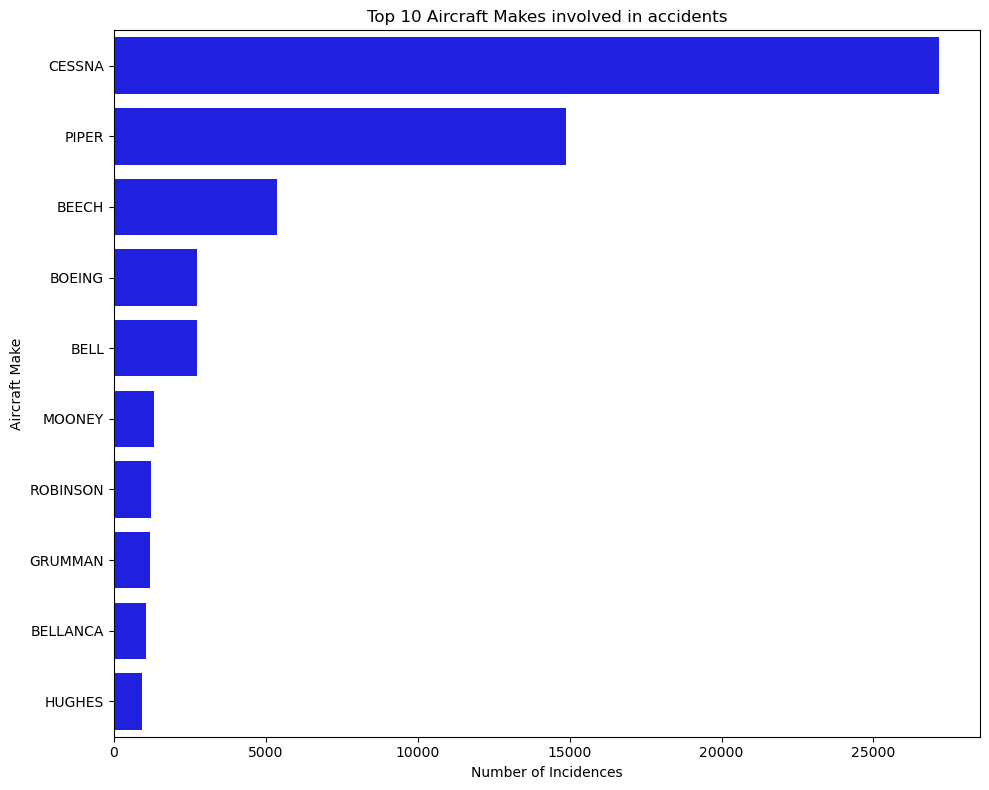

In [65]:
# Clean and standardize the Make column to remove extra white spaces or different capitalization
df['Make']= df['Make'].str.upper().str.strip()

# Top 10 Aircraft makes by frequency
top_makes = df['Make'].value_counts().head(10)

#Plotting
plt.figure(figsize= (10,8))
sns.barplot(x= top_makes.values, y= top_makes.index, color="blue")
plt.title("Top 10 Aircraft Makes involved in accidents")
plt.xlabel("Number of Incidences")
plt.ylabel("Aircraft Make")
plt.tight_layout()
plt.show();

This chart displays the top 10 Aircraft manufactures most frequently involved in reported incidents. Cessna has the most leading incidences of over 20000 incidences while Piper, Bell, Boeing, Grumman and  Mooney manufactures have less than 5000 reported incidences. The Make column was standardized by converting all values to uppercase and removing leading/trailing whitespace. This ensures that different variations of the same manufacturer (like "Cessna", "CESSNA", or "CESSNA ") are treated consistently, avoiding duplicate entries in the analysis. 

Cessna consistently emerges as the aircraft make with the highest reported incidents.

## Most Frequently Involved Aircraft Models

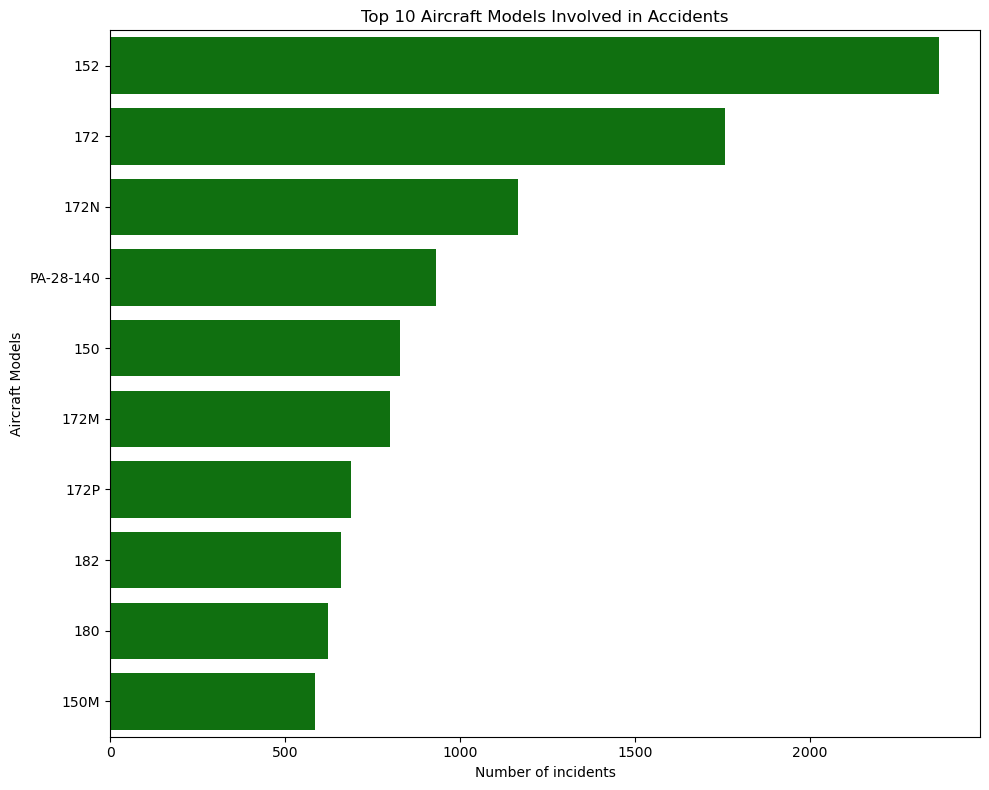

In [107]:
#Top 10 Models involved in Accidents 

top_models = df['Model'].value_counts().head(10)

#Plot graph for the top_models
plt.figure(figsize=(10,8))
sns.barplot(x= top_models.values, y=top_models.index, color="green")
plt.title("Top 10 Aircraft Models Involved in Accidents")
plt.xlabel("Number of incidents")
plt.ylabel("Aircraft Models")
plt.tight_layout()
plt.show();

This chart highlights the aircraft models with the highest number of recorded incidents. The Aircraft Model 152 leads with over 2,000 incidents, while the Model 150M has a significantly lower incident count of just over 500.

This analysis gives us a clear picture of which specific aircraft models are most frequently involved in accidents. By identifying these models, we can focus on understanding the factors contributing to their high incident rates. For example, the higher number of incidents for Model 152 might be attributed to its widespread use or specific operational contexts, whereas Model 150M may require further analysis to determine why it has relatively fewer incidents.

### Analysis of Accident Severity 

With the most frequent aircraft makes and the top aircraft models involved in accidents identified, the next step is to analyze accident severity and correlate it with specific makes and models.

### 1. Assess Accident Severity:
You can calculate severity metrics like the number of fatalities, serious injuries, and minor injuries.

This will allow you to evaluate whether more frequent accidents correlate with more severe outcomes.

Severity metrics could include:

* Fatality Rate: Number of fatalities / Total number of accidents.

* Injury Rate: Total injuries (fatal + serious + minor) / Total number of accidents.

### 2. Group by Aircraft Make and Model:

You can group by both aircraft make and model to calculate these severity metrics.

In [118]:
#Severity metrics by Aircraft Make
# Normalize the 'Make' column to ensure consistency (e.g., convert all names to uppercase)
df['Make'] = df['Make'].str.upper()

# Group by 'make' and sum up the injury-related fields
severity_by_make = df.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Calculate fatality rate and injury rate
accidents_by_make = df['Make'].value_counts()
severity_by_make['fatality_rate'] = severity_by_make['Total.Fatal.Injuries'] / accidents_by_make
severity_by_make['injury_rate'] = (severity_by_make['Total.Fatal.Injuries'] + severity_by_make['Total.Serious.Injuries'] + severity_by_make['Total.Minor.Injuries']) / accidents_by_make

# Sort by fatality rate or injury rate
severity_by_make_sorted = severity_by_make.sort_values(by='fatality_rate', ascending=False)

# Display the top 10 aircraft makes by fatality rate
print(severity_by_make_sorted.head(10))


                    Total.Fatal.Injuries  Total.Serious.Injuries  \
Make                                                               
TUPOLEV                              509                       0   
VIKING AIR LIMITED                    23                       0   
AVIOCAR CASA                          18                       0   
MIL                                   13                       0   
MIL DESIGN BUREAU                     13                       0   
ANTONOV                               71                       0   
EMBRAER AIRCRAFT                      10                       0   
AIRVAN                                 9                       0   
M7AERO                                 8                       0   
JETSTREAM                             23                       0   

                    Total.Minor.Injuries  fatality_rate  injury_rate  
Make                                                                  
TUPOLEV                                0 

### Key Insights and Observations

**Aircraft Makes with the Highest Fatality Rate:**

* TUPOLEV has the highest fatality rate of 127.25 with 509 fatal injuries and no reported minor injuries. This suggests that accidents involving Tupolev aircraft are often fatal and do not typically involve non-fatal injuries. 

**Other Makes with Relatively High Fatality Rates are as follows:**

* VIKING AIR LIMITED has a fatality rate of 23 with 23 fatal injuries. Despite this relatively high rate, it reports no serious or minor injuries, indicating that accidents involving this make tend to result in fatalities but fewer other types of injuries.

* AVIOCAR CASA and MIL, each with 18 and 13 fatal injuries respectively, have fatality rates of 18 and 13, showing that accidents involving these aircraft tend to be fatal.

Makes like EMBRAER AIRCRAFT, AIRVAN, M7AERO, and JETSTREAM have lower fatality rates, suggesting that accidents with these aircraft are less likely to result in fatalities and may involve fewer injuries overall. ANTONOV has a small number of minor injuries, indicating that its accidents might have a more varied severity, though fatalities remain high.

**Conclusion:**

This dataset indicates that some aircraft makes, especially TUPOLEV, tend to be involved in accidents with very high fatality rates, while others have comparatively lower fatality rates but still report fatalities. The presence of minor injuries in a few cases (like ANTONOV and M7AERO) shows that not all accidents are as severe as those involving TUPOLEV.

In [125]:
# Severity Metrics by Aircraft Model 
# Group by 'model' and sum up the injury-related fields
severity_by_model = df.groupby('Model')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Calculate fatality rate and injury rate by model
accidents_by_model = df['Model'].value_counts()
severity_by_model['fatality_rate'] = severity_by_model['Total.Fatal.Injuries'] / accidents_by_model
severity_by_model['injury_rate'] = (severity_by_model['Total.Fatal.Injuries'] + severity_by_model['Total.Serious.Injuries'] + severity_by_model['Total.Minor.Injuries']) / accidents_by_model

# Sort by fatality rate or injury rate
severity_by_model_sorted = severity_by_model.sort_values(by='fatality_rate', ascending=False)

# Display the top 10 aircraft models by fatality rate
print(severity_by_model_sorted.head(10))

               Total.Fatal.Injuries  Total.Serious.Injuries  \
Model                                                         
747-168                         349                       0   
TU-154                          349                       0   
767-366-ER                      217                       0   
777 - 206                       534                       0   
A 310                           169                       0   
A320 - 216                      162                       0   
E135 Legacy                     154                       0   
A310-300                        124                      59   
-737-222                        123                       0   
CitationJet 2                   118                       0   

               Total.Minor.Injuries  fatality_rate  injury_rate  
Model                                                            
747-168                           0          349.0        349.0  
TU-154                            0          

### Key Insights and Observations 

**Aircraft Models with the Highest Fatality Rates:**

* 747-168 and TU-154 both have the highest fatality rates of 349.0, with 349 fatal injuries. These models have no reported minor injuries, indicating that accidents involving these models tend to result in fatalities without lesser injuries.

* 777 - 206 also has a high fatality rate of 178.0, with 534 fatal injuries, but fewer fatalities compared to the 747-168 and TU-154 (despite having the highest number of fatal injuries). This suggests that accidents with the 777 - 206 are still highly fatal but might involve more cases where the fatalities are more frequent but not as severe in the average incident.

**Other Models with High Fatality Rates:**

* 767-366-ER has a fatality rate of 217.0, with 217 fatal injuries. It is also a model associated with a relatively high number of fatal accidents.

* A320 - 216 has 162 fatal injuries and a fatality rate of 162.0, showing that accidents involving this model tend to result in fatalities, but the fatality rate is not as high as some other models like the 747-168 or TU-154.

* A310 has 169 fatal injuries and a fatality rate of 169.0, indicating a relatively high number of fatalities compared to other aircraft.

**Aircraft Models with Lower Fatality Rates:**

* CitationJet 2 has 118 fatal injuries and a fatality rate of 118.0, which is still significant, but lower compared to other aircraft in the dataset.

* A310-300 has 124 fatal injuries, but it shows a relatively higher injury rate (183.0) due to the 59 serious injuries reported, making this model unique in having both a higher number of serious injuries and fatalities compared to other models. This suggests that accidents with A310-300 tend to result in more severe injuries, in addition to fatalities.

**Minor Injuries:**

A310 is the only model with 10 minor injuries reported, while the rest of the models have no reported minor injuries. This indicates that accidents involving A310 may involve a mix of serious or fatal outcomes as well as minor injuries.

**Conclusion:**

This dataset shows that many of the aircraft models, particularly 747-168, TU-154, 767-366-ER, and 777 - 206, are involved in accidents with high fatality rates, and they often result in fatalities with very few minor injuries. However, A310-300 stands out for having a higher injury rate due to the presence of serious injuries, indicating that its accidents may be more severe on average. CitationJet 2 and A320 - 216 have relatively lower fatality rates, suggesting fewer fatalities in accidents involving these models.

# Visualizing the severity

Visualize the severity of accidents for the top 10 aircraft makes and models, ranked by fatality and injury rates.

## Trends in Accidents over time

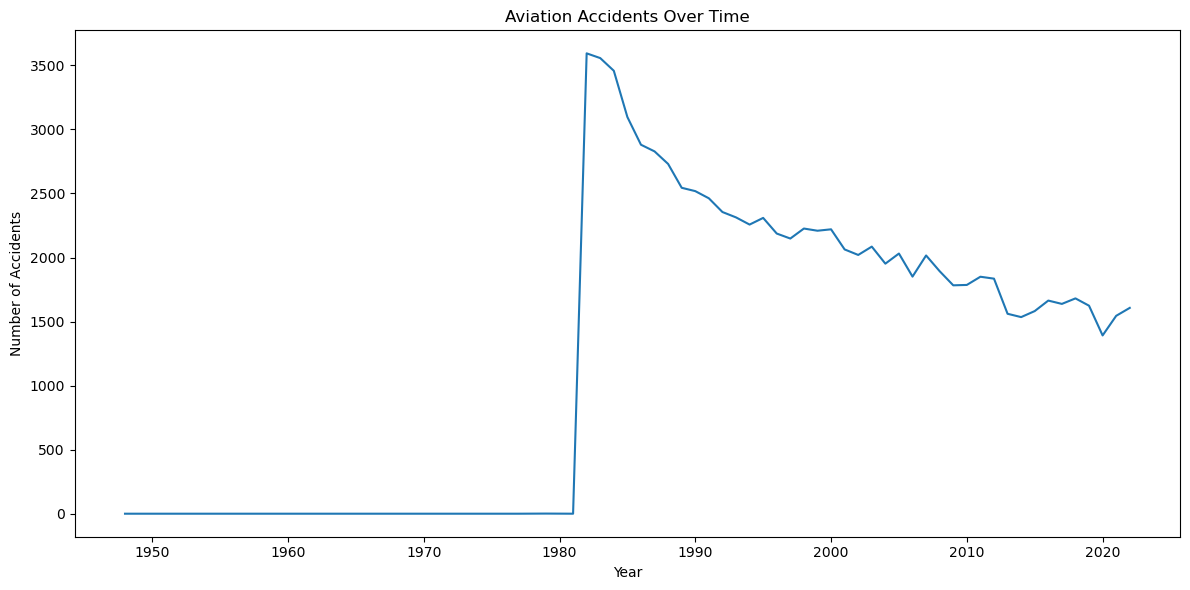

In [107]:
# Parse dates and extract year
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

# Count accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title("Aviation Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()


The analyzing of accident trends over time shows whether the number of accidents have improved. The chart shows that their is a decline as the year progresses in the number of accidents.